In [1]:
import thomsonpy.thomson_scattering.thomson_scattering_tools as thtools
import thomsonpy.config.thomson_scattering_params as tsp
import thomsonpy.config.solar_imager_params as sip
import thomsonpy.constants.units as units
import thomsonpy.data_management.formatter as formatter
import thomsonpy.config.paths as paths
import thomsonpy.data_management.octree.octree as octr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:


def create_test():
    print("Imaging between", sip.IMAGE_MIN * units.METERS_TO_RSOL, "RSol and" , sip.IMAGE_MAX * units.METERS_TO_RSOL, "RSol.")
    print("Resolution = ", sip.IMAGE_RESOLUTION / 1000, " km (", sip.IMAGE_NUM_POINTS, "x", sip.IMAGE_NUM_POINTS, ").")
    x_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS) # de - a +
    #print(x_values)
    y_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS)[::-1] # de + a -
    #print(y_values)
    model = np.zeros((sip.IMAGE_NUM_POINTS, sip.IMAGE_NUM_POINTS))
    print("# Numeric integral steps =", tsp.NUM_Z)

    # Quadrant 1

    num_points = sip.IMAGE_NUM_POINTS * sip.IMAGE_NUM_POINTS / 4
    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2):
        for x in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")
    # Quadrant 2


    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2):
        for x in range(sip.IMAGE_NUM_POINTS // 2):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    # Quadrant 3

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS // 2):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0 

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    # Quadrant 4

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")
    formatter.dump("thomsonscattering_crammer.np", model)
    formatter.load("thomsonscattering_crammer.np")
    
def create_image():
    # Quadrant 1
    print("Loading octree...")
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_1.oct")
    print("Octree loaded.")

    num_points = sip.IMAGE_NUM_POINTS * sip.IMAGE_NUM_POINTS / 4
    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2):
        for x in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")


    # Quadrant 2
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_2.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2):
        for x in range(sip.IMAGE_NUM_POINTS // 2):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    # Quadrant 3
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_3.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS // 2):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0 

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    # Quadrant 4
    NE_MODEL = Octree.load("../../../../" + paths.OCTREE_OBJECTS_PATH + "octree_4.oct")

    count = 0
    for y in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS // 2, sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)

                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 100 == 0:
                print("Progress", count / num_points * 100,"%")

    formatter.dump("thomsonscattering.np", model)
    model = formatter.load("thomsonscattering.np")



Imaging between [0. 0.] RSol and [3. 3.] RSol.
Resolution =  10000.0  km ( 418 x 418 ).
# Numeric integral steps = 12.0
Loading octree...
Octree loaded.


In [2]:
"""
Starts execution of solar corona modeling with the Predictive Science model.
"""
print("Imaging between", sip.IMAGE_MIN * units.METERS_TO_RSOL, "RSol and" , sip.IMAGE_MAX * units.METERS_TO_RSOL, "RSol.")
print("Resolution = ", sip.IMAGE_RESOLUTION / 1000, " km (", sip.IMAGE_NUM_POINTS, "x", sip.IMAGE_NUM_POINTS, ").")
x_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS) # de - a +
#print(x_values * units.METERS_TO_RSOL)
y_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS)[::-1] # de + a -
#print(y_values * units.METERS_TO_RSOL)
model = np.zeros((sip.IMAGE_NUM_POINTS, sip.IMAGE_NUM_POINTS))
print("# Numeric integral steps =", tsp.NUM_Z)

Imaging between [0. 0.] RSol and [3. 3.] RSol.
Resolution =  10000.0  km ( 209 x 209 ).
# Numeric integral steps = 12.0


In [6]:
def create_quadrant():
    # Quadrant 1
    print("Loading octree...")
    NE_MODEL = octr.Octree.load("../../" + paths.OCTREES_PATH + "octree_1.oct")
    print("Octree loaded.")

    num_points = sip.IMAGE_NUM_POINTS * sip.IMAGE_NUM_POINTS
    print(f"Num points = {num_points}")
    count = 0
    for y in range(sip.IMAGE_NUM_POINTS):
        for x in range(sip.IMAGE_NUM_POINTS):
            if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
                # Coordinates with the center of the Sun as Origin of the Reference System.
                target = (x_values[x], y_values[y], 0)
                #print(target * units.METERS_TO_RSOL)
                # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
                TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

                # Line of sight integration generating a value for the scattered light model.
                scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
                model[y][x] = scattered_light
            else:
                model[y][x] = 0

            # Progress
            count += 1
            if count % 1000 == 0:
                print("Progress", count / num_points * 100,"%")
                
    formatter.dump(f"../../{paths.MODELS_PATH}predsci_first_quadrant.np", model)
    return model
    
# Testing with Crammer model
#crammer = formatter.load("thomsonscattering_crammer.np")
#predsci = formatter.load("thomsonscattering.np") * 1e8
original = model
#create_quadrant()
#predsci = formatter.load("predsci_first_quadrant.np")
predsci = model

/tmp/ipykernel_7537/3800012686.py:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(model), extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])


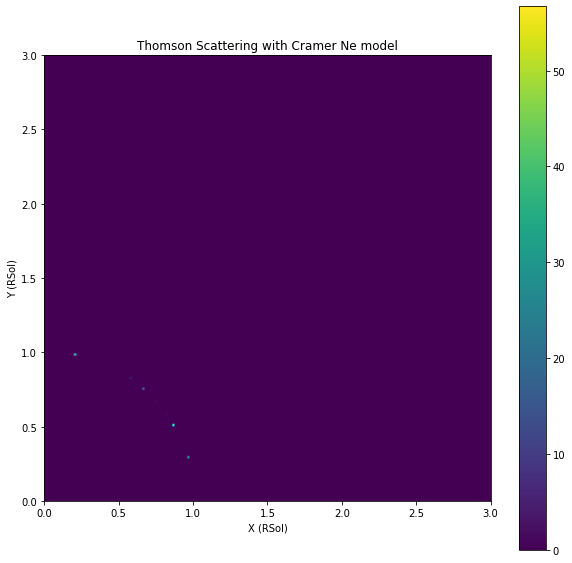

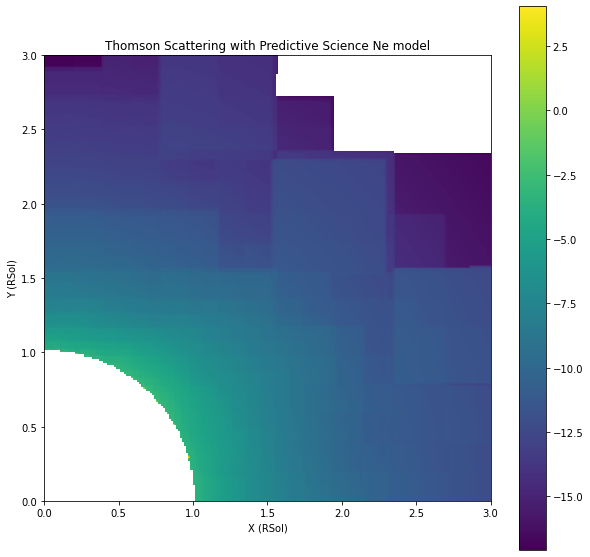

In [13]:
#model = crammer
"""
Visualization of the ThomsonScattering.
"""

plt.figure(figsize=(10, 10))
plt.title("Thomson Scattering with Cramer Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(model, extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

model = predsci
"""
Visualization of the ThomsonScattering.
"""

plt.figure(figsize=(10, 10))
plt.title("Thomson Scattering with Predictive Science Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(np.log(model), extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()

In [7]:
"""
model = crammer
test = model[0:(sip.IMAGE_NUM_POINTS // 2), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS]
for i in test:
    print(i)
"""

'\nmodel = crammer\ntest = model[0:(sip.IMAGE_NUM_POINTS // 2), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS]\nfor i in test:\n    print(i)\n'

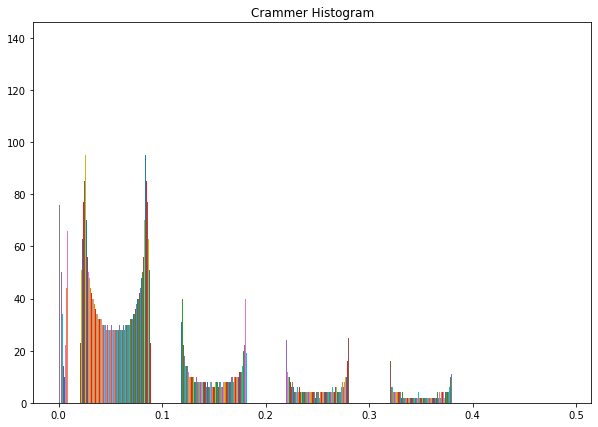

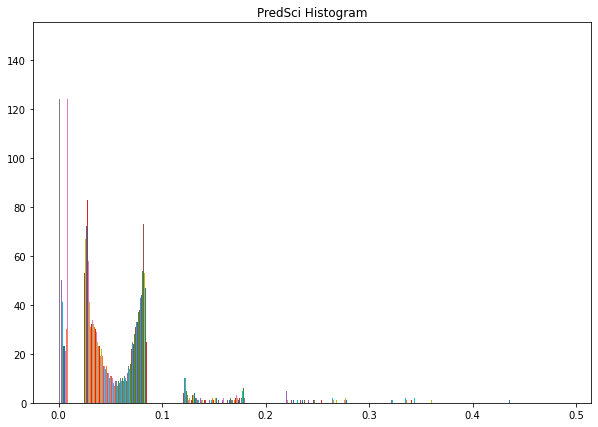

In [4]:
# Crammer
model = crammer
fig = plt.figure(figsize =(10, 7))
 
plt.hist(model, bins = [0, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5])
 
plt.title("Crammer Histogram")
 
# PredSci
model = predsci
plt.show()

fig = plt.figure(figsize =(10, 7))
 
plt.hist(model, bins = [0, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5])
 
plt.title("PredSci Histogram")
 
# show plot
plt.show()

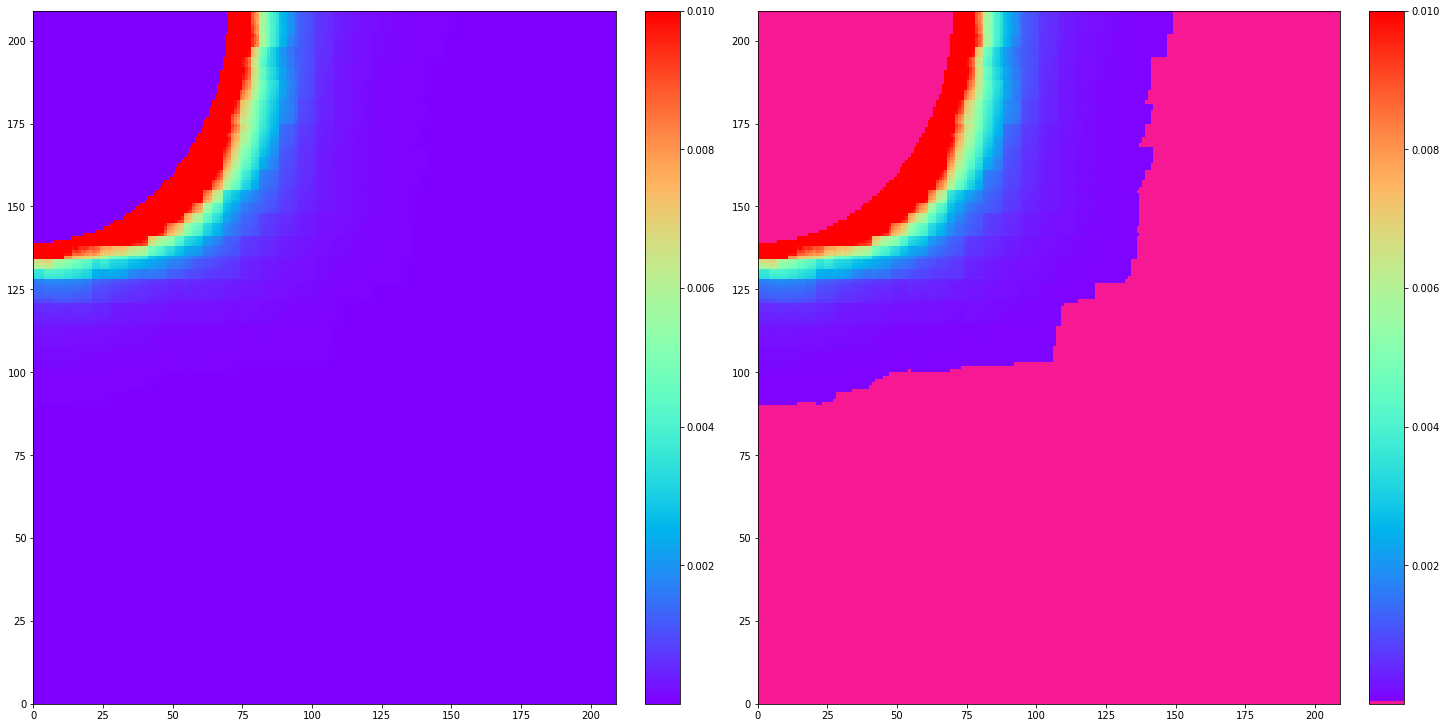

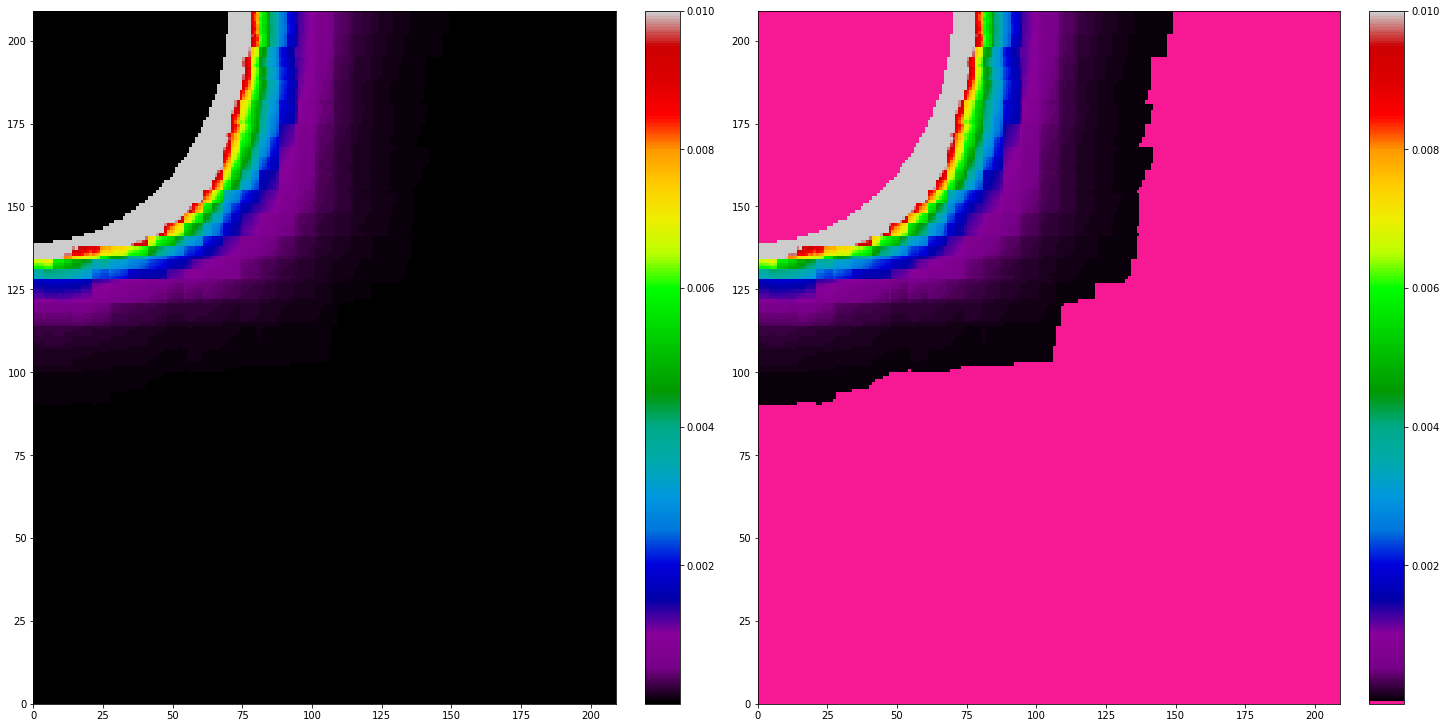

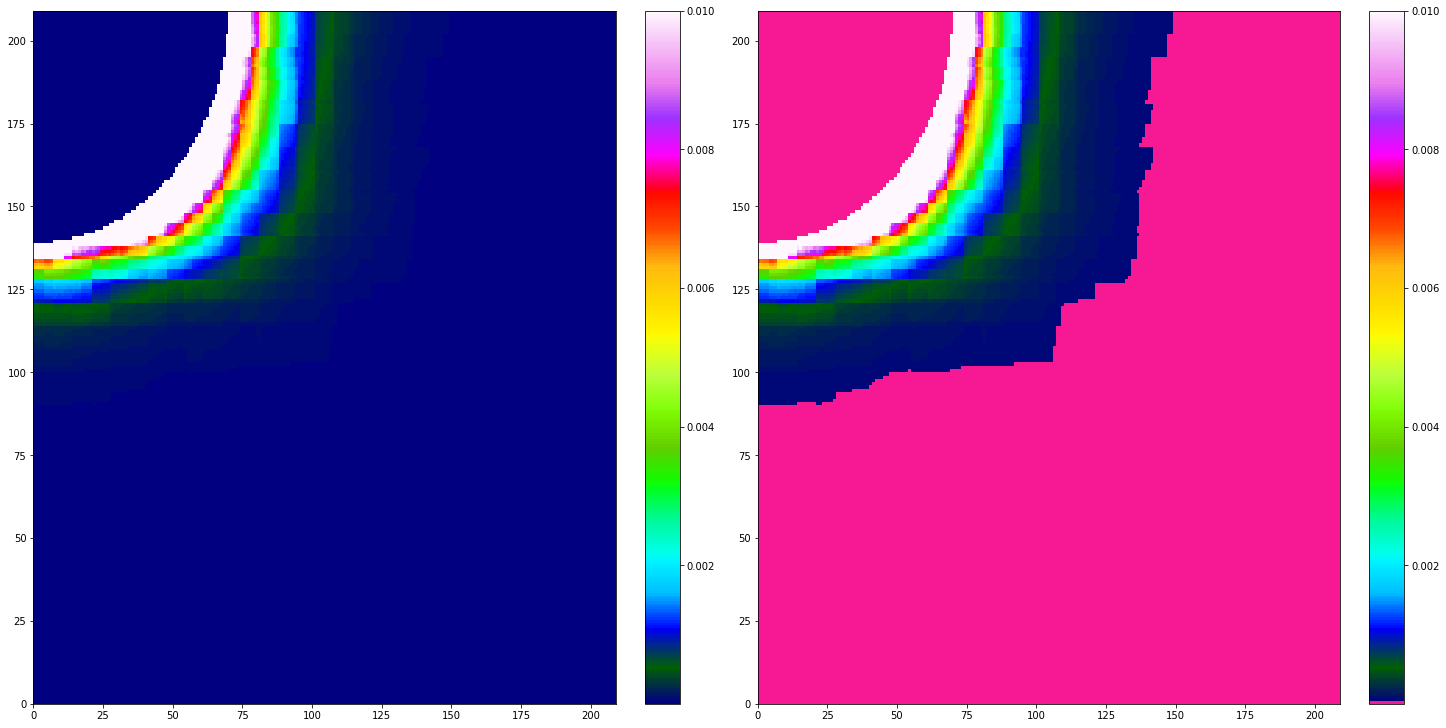

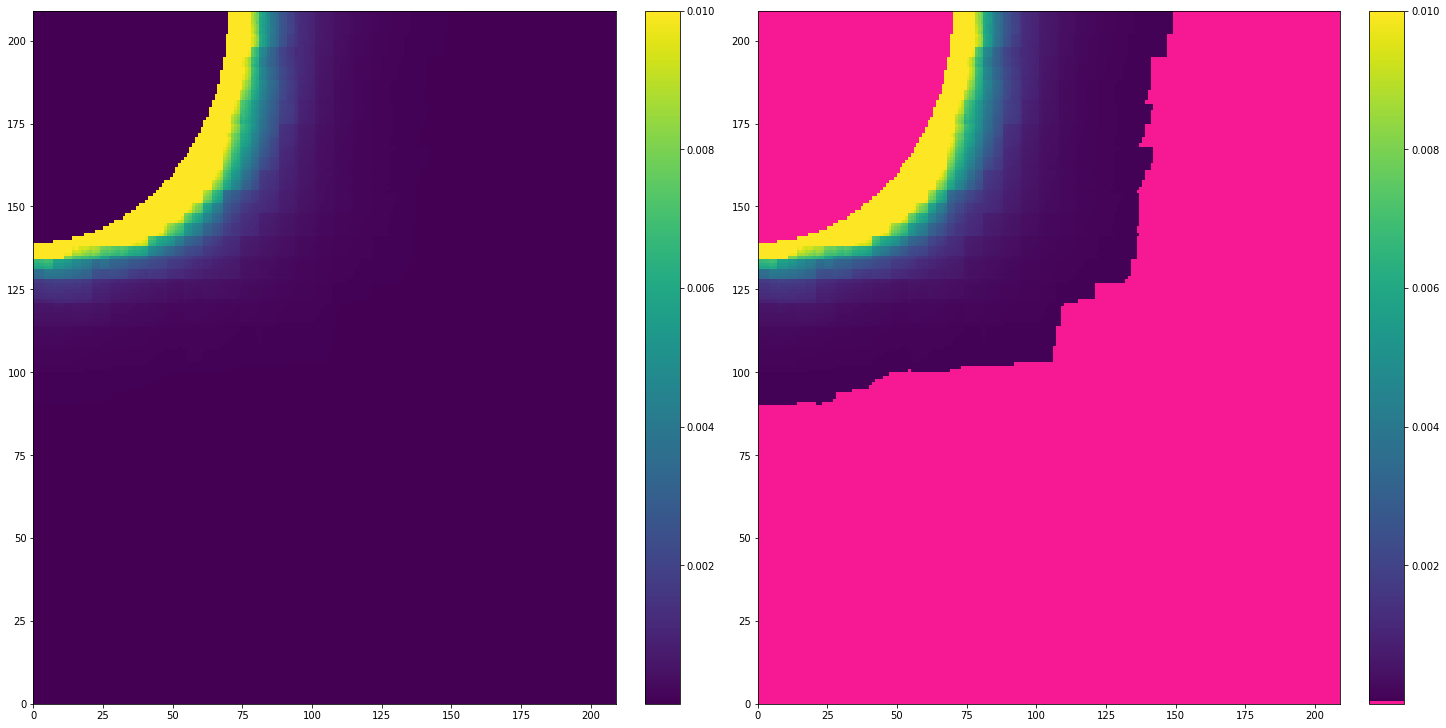

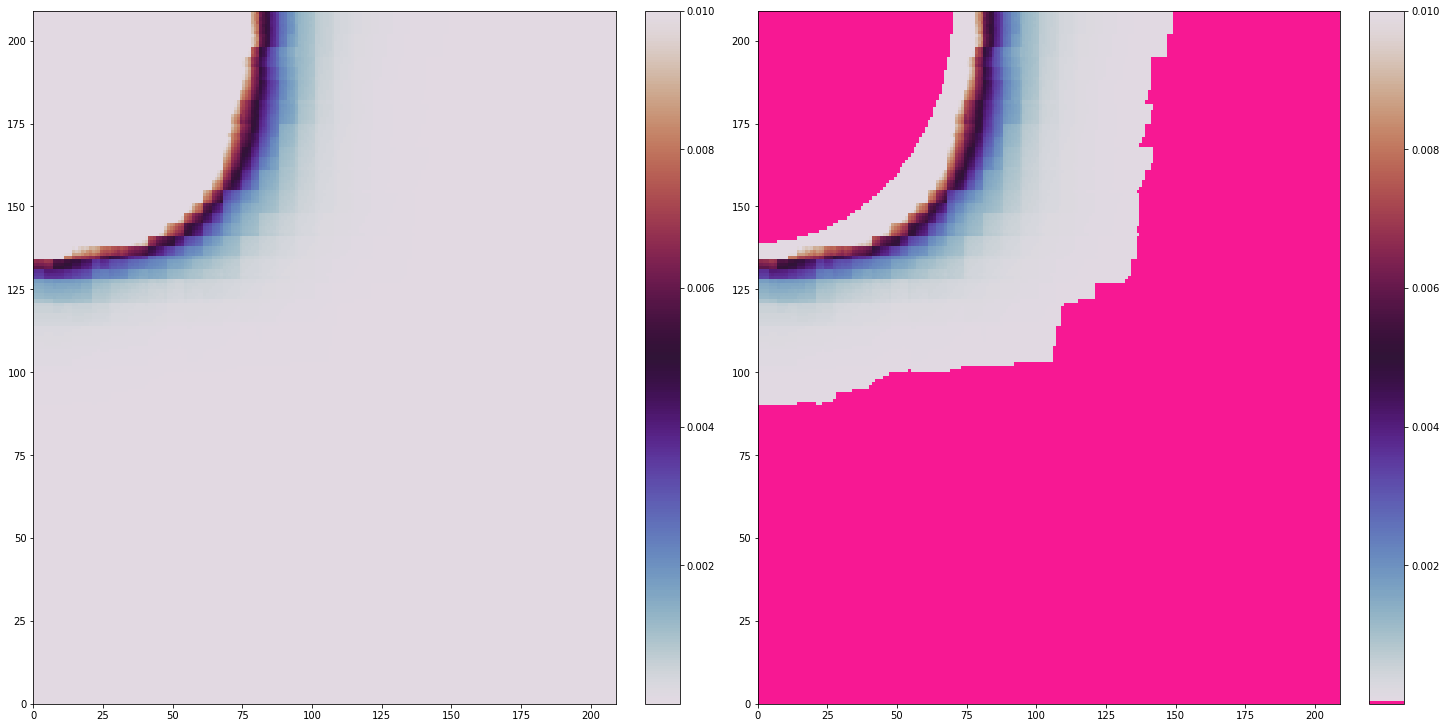

In [14]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(cms, mini, maxi):
    """
    helper function to plot two colormaps
    """
    data = model

    fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=mini, vmax=maxi)
        fig.colorbar(psm, ax=ax)
    plt.show()
colormaps = ['rainbow', 'nipy_spectral', 'gist_ncar', 'viridis', 'twilight']



for i in colormaps:
    model = predsci
    
    viridis = plt.get_cmap(i, 256)
    newcolors = viridis(np.linspace(0, 1, 256))
    pink = np.array([248/256, 24/256, 148/256, 1])
    newcolors[:1, :] = pink
    newcmp = ListedColormap(newcolors)
    plot_examples([viridis, newcmp], 1e-8, 1e-2)
    """  
    model = crammer
    
    viridis = plt.get_cmap(i, 256)
    newcolors = viridis(np.linspace(0, 1, 256))
    pink = np.array([248/256, 24/256, 148/256, 1])
    newcolors[:1, :] = pink
    newcmp = ListedColormap(newcolors)
    plot_examples([viridis, newcmp], 1e-5, 1)
    """

/tmp/ipykernel_9476/3103828129.py:67: RuntimeWarning: divide by zero encountered in log
  visualize_quadrants(np.log(crammer))
/tmp/ipykernel_9476/3103828129.py:68: RuntimeWarning: divide by zero encountered in log
  visualize_quadrants(np.log(predsci))
/tmp/ipykernel_9476/3103828129.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 12))


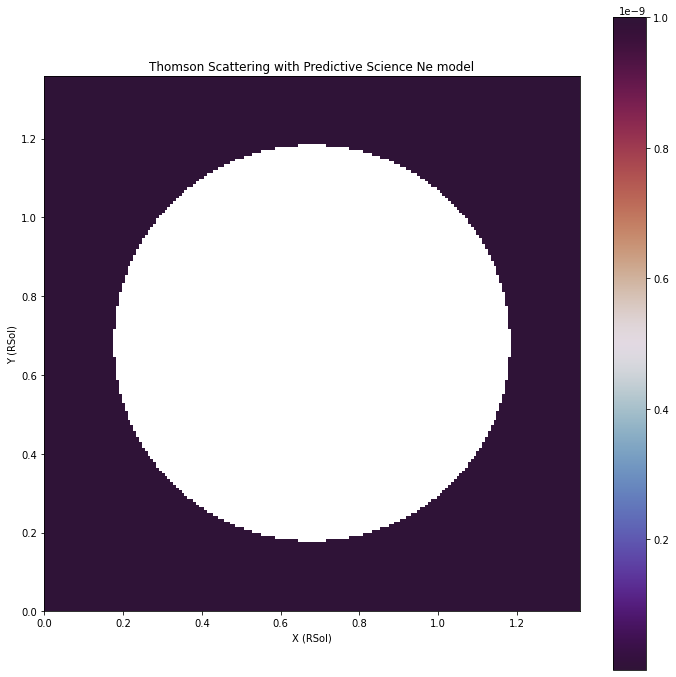

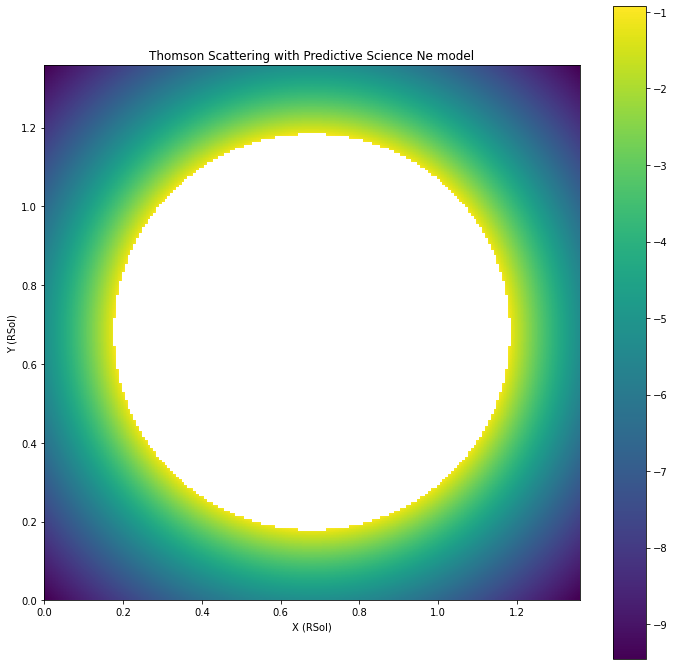

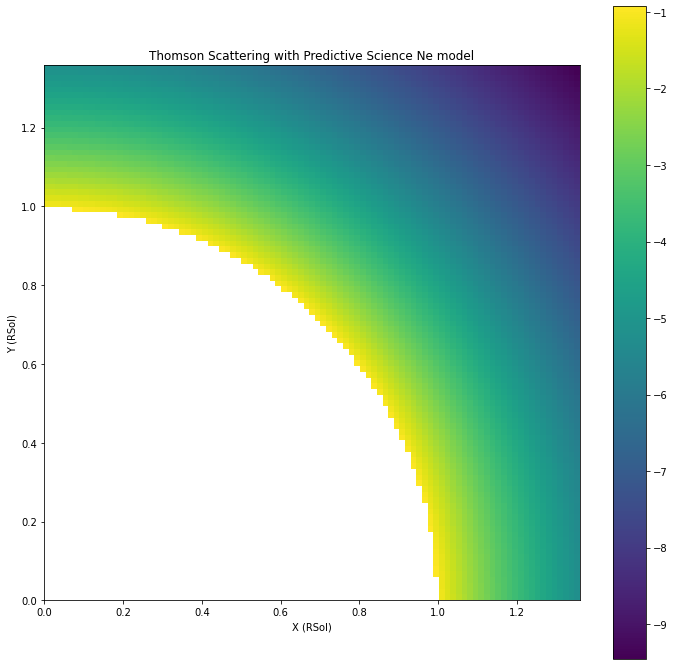

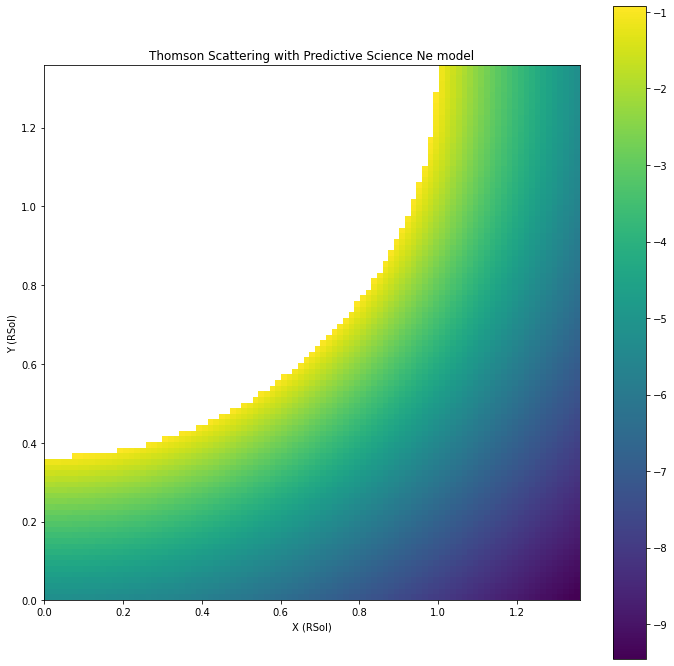

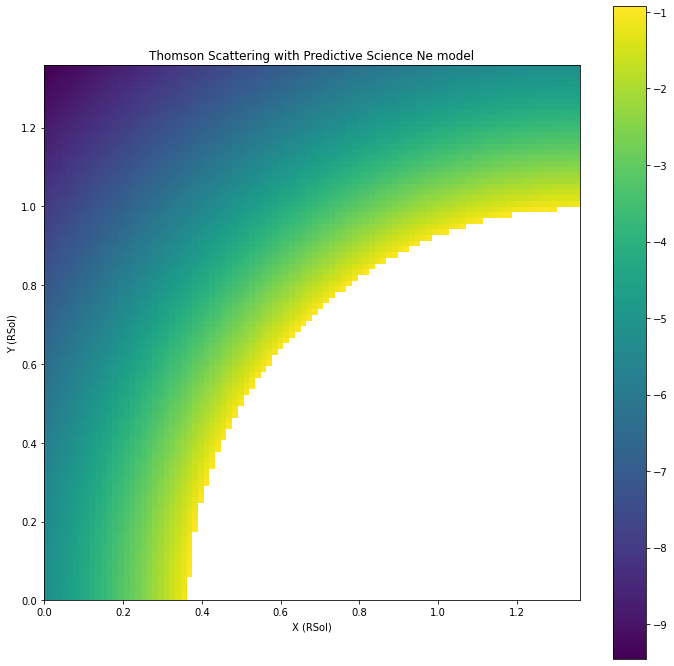

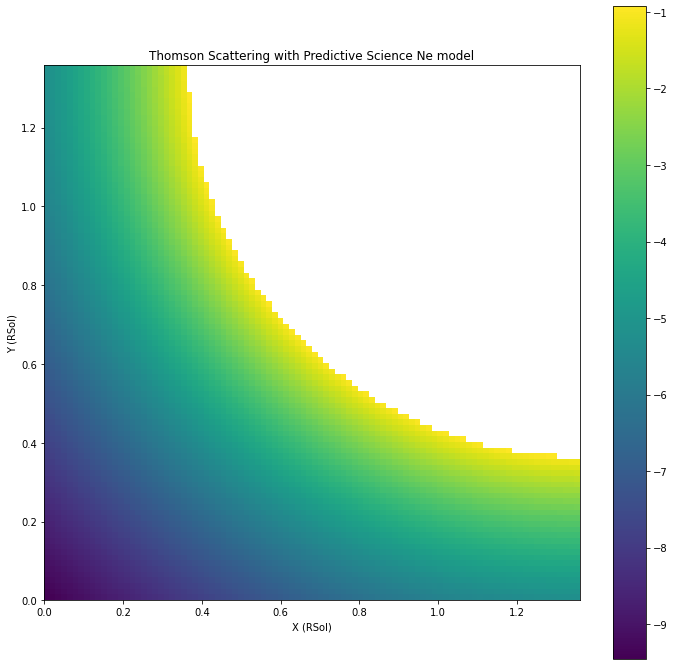

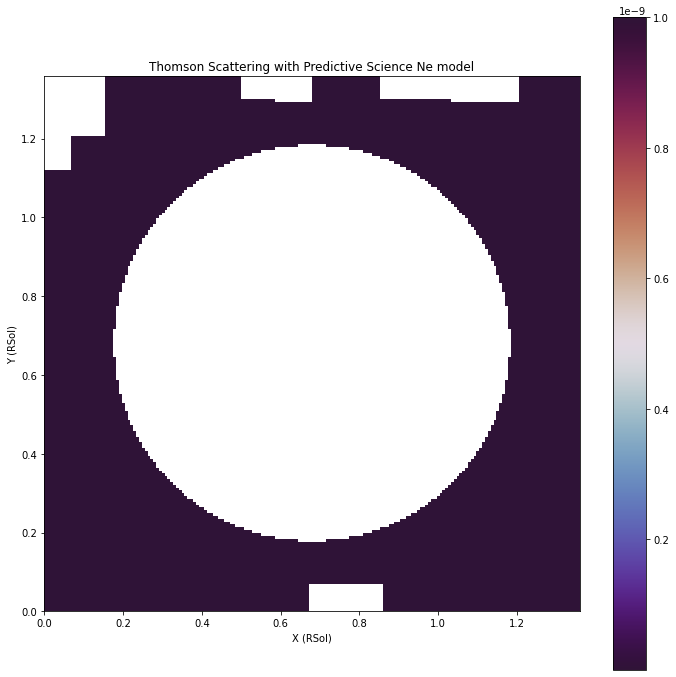

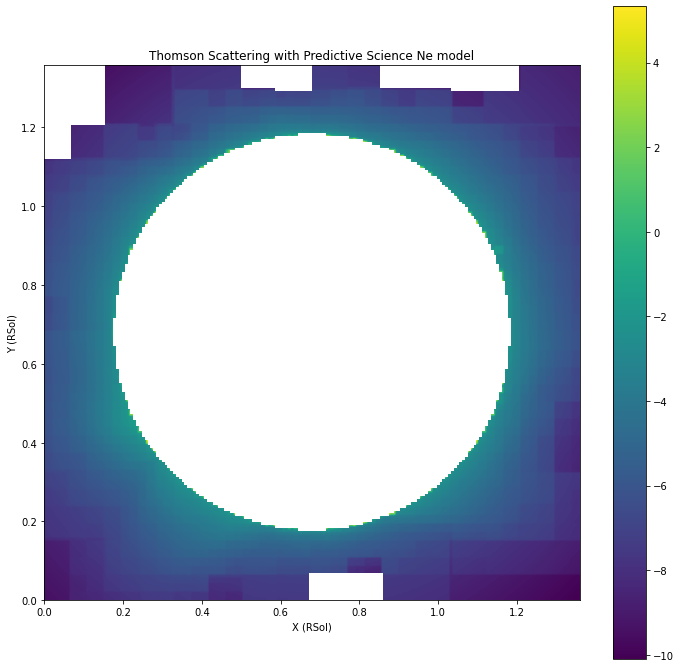

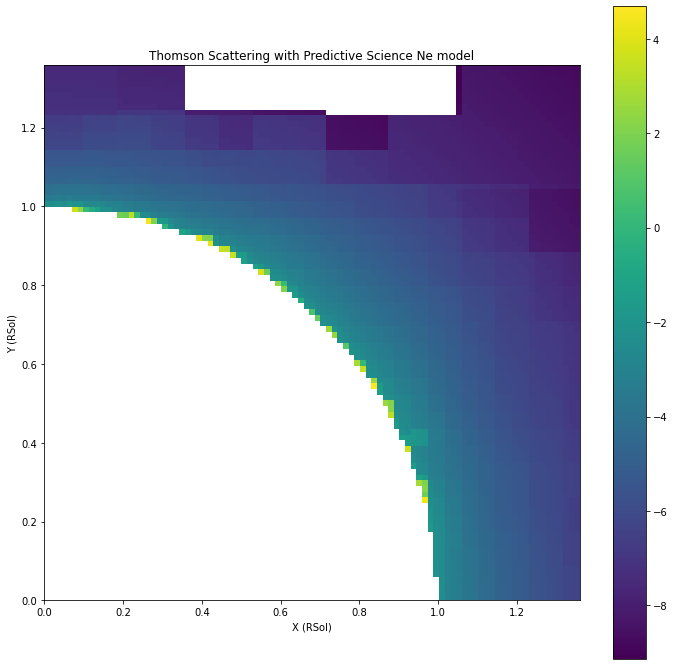

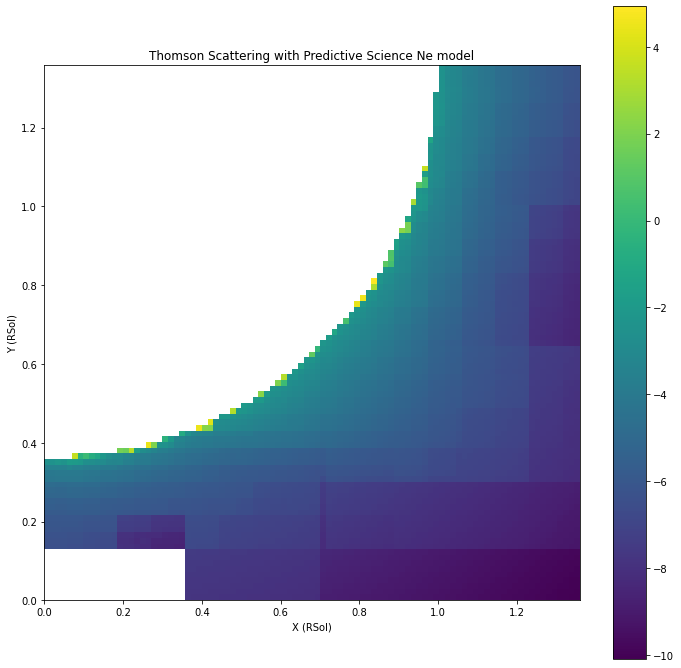

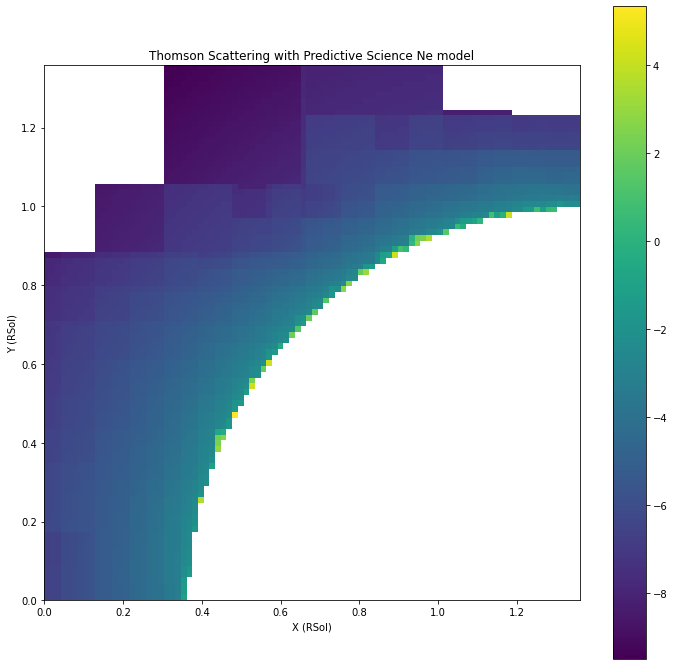

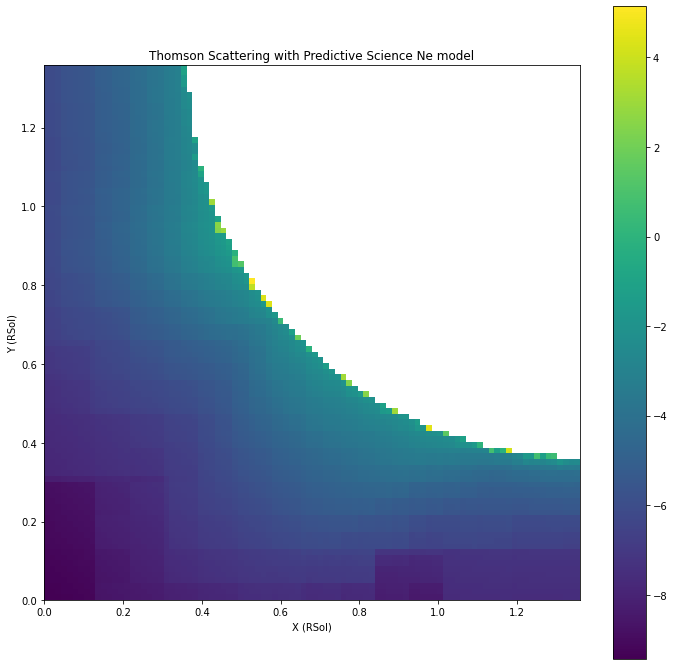

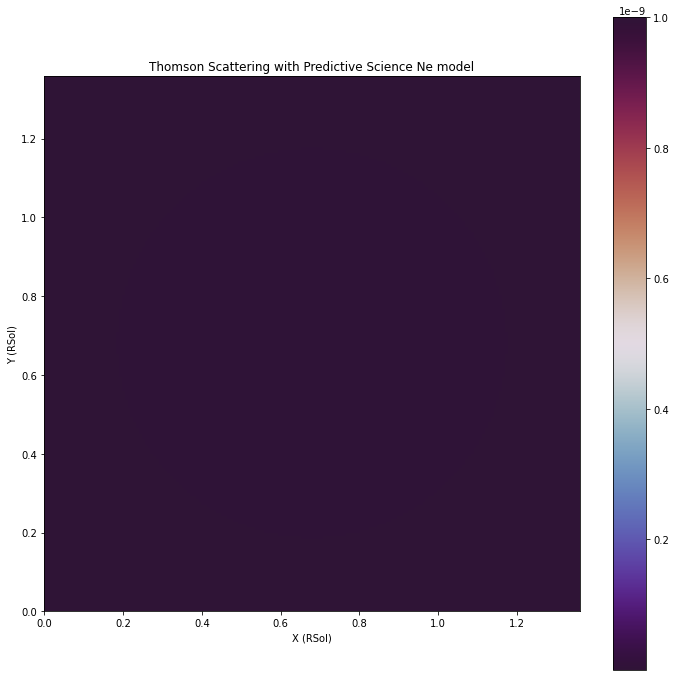

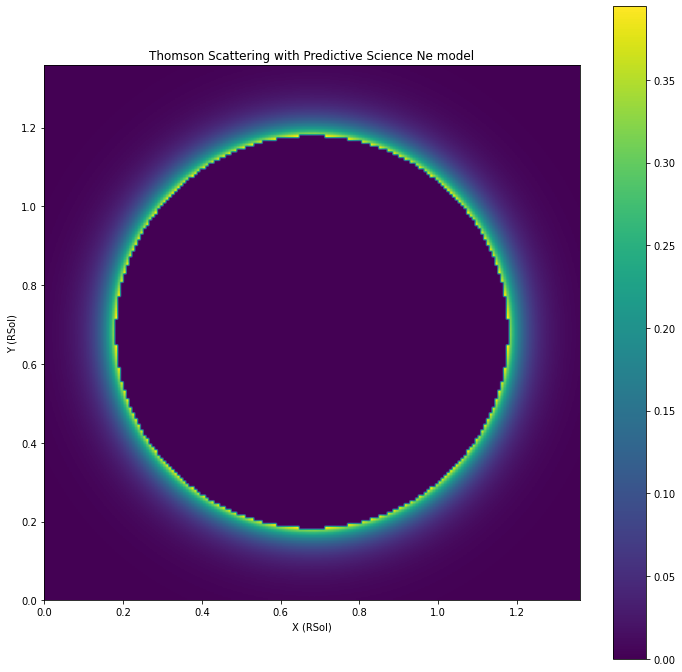

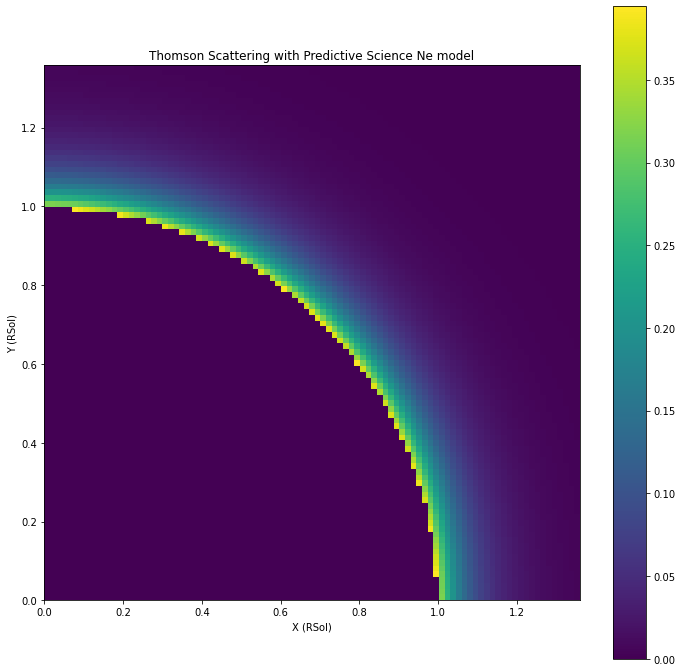

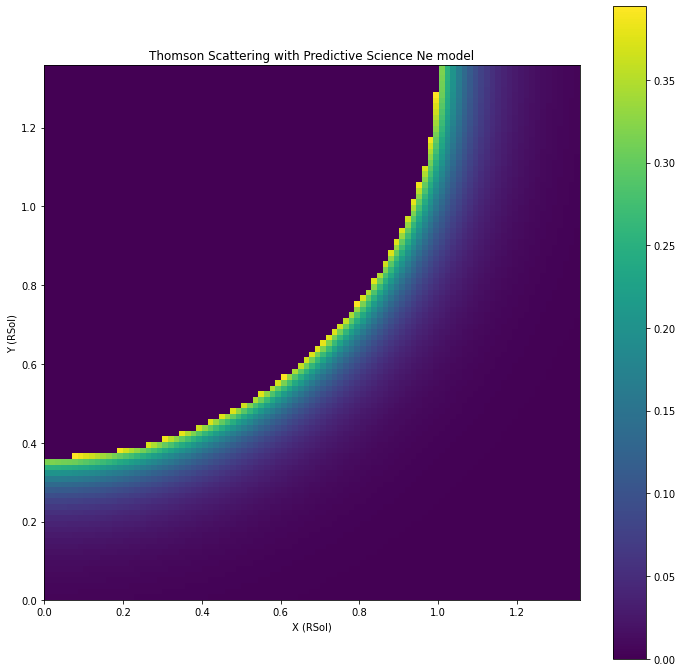

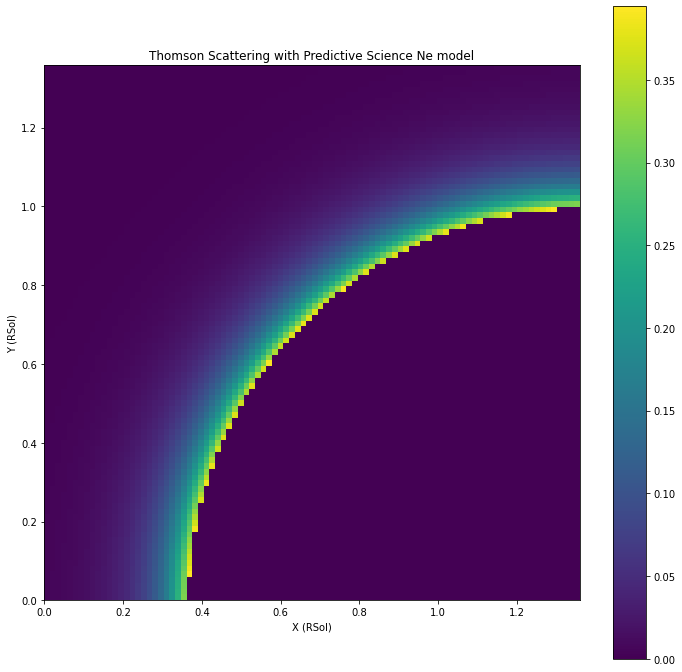

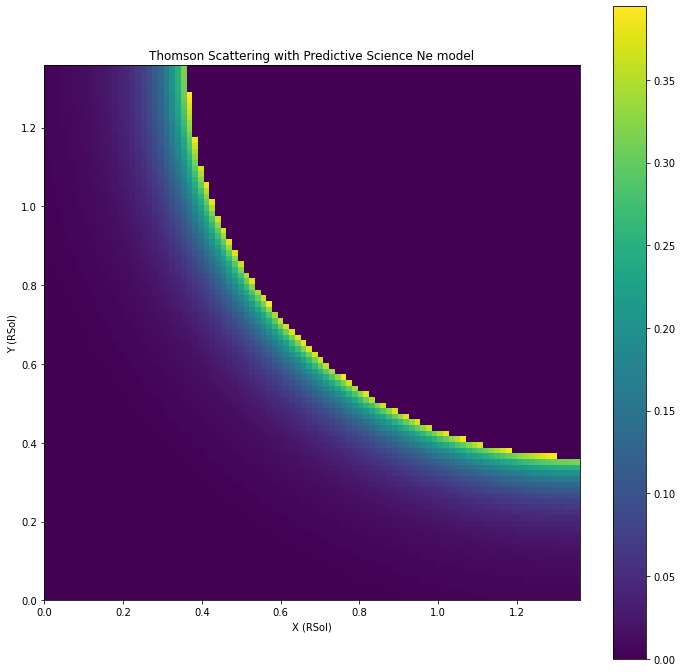

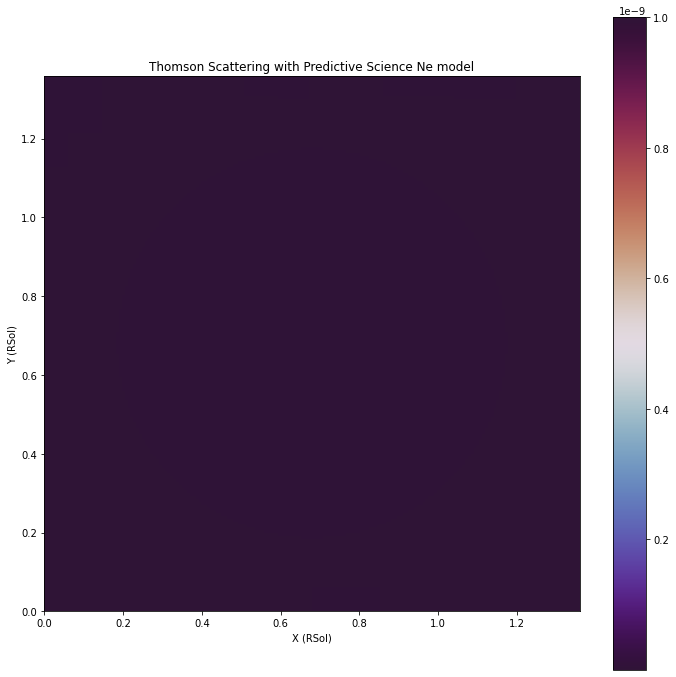

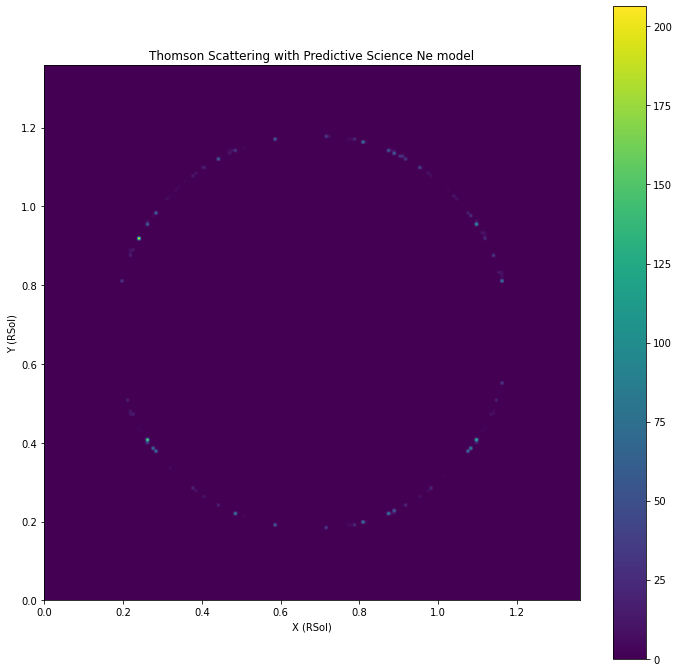

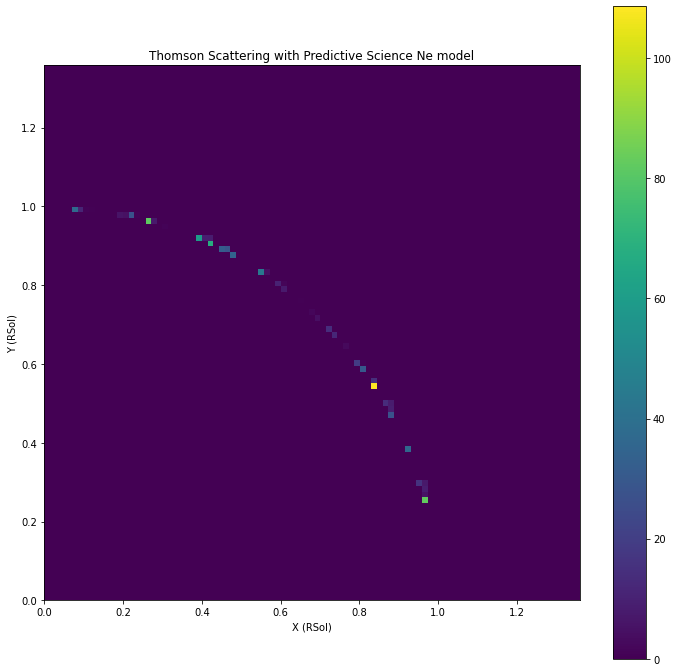

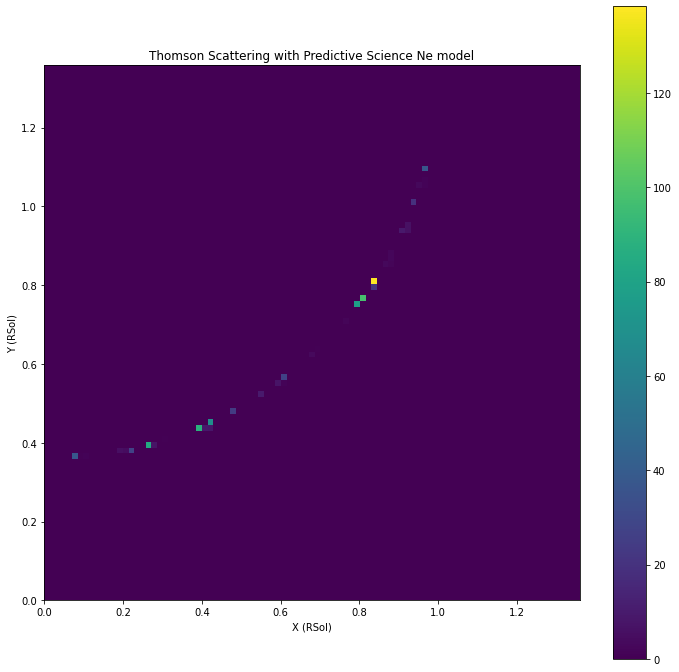

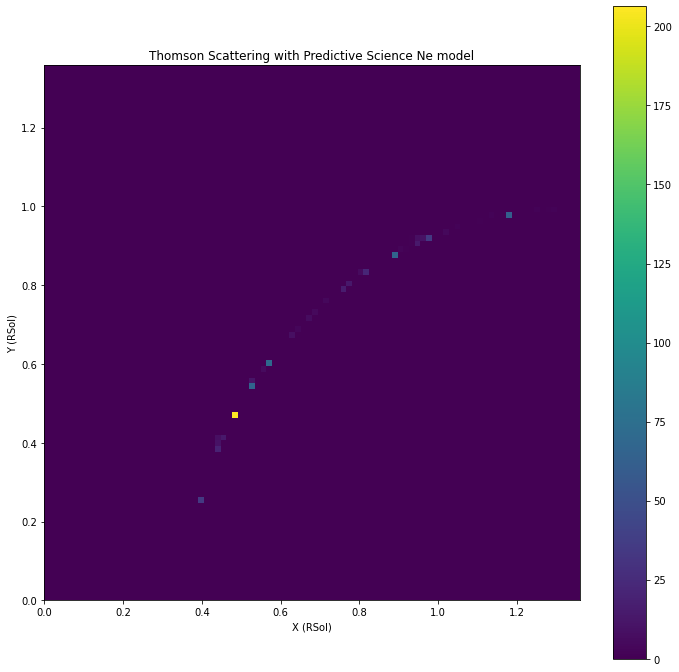

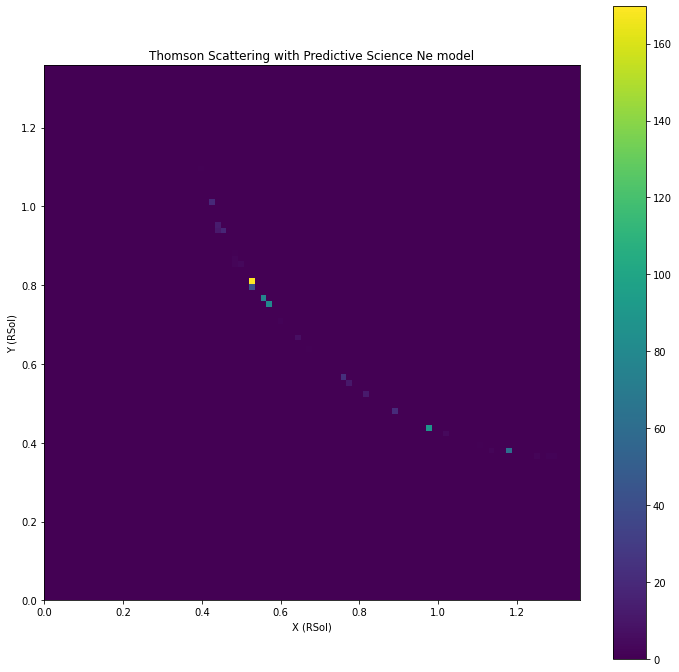

In [6]:
def visualize_quadrants(model):
    """
    Visualization of the Thomson Scattering.
    """
    plt.figure(figsize=(12, 12))
    plt.title("Thomson Scattering with Predictive Science Ne model")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    plt.imshow(model, cmap = 'twilight_shifted', vmin = 1e-13, vmax = 1e-9, extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()
    """
    Visualization of the Thomson Scattering.
    """

    plt.figure(figsize=(12, 12))
    plt.title("Thomson Scattering with Predictive Science Ne model")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    plt.imshow(model, extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()

    """
    Visualization of the Thomson Scattering.
    """

    plt.figure(figsize=(12, 12))
    plt.title("Thomson Scattering with Predictive Science Ne model")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    plt.imshow(model[0:(sip.IMAGE_NUM_POINTS // 2), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS], extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()

    """
    Visualization of the Thomson Scattering.
    """

    plt.figure(figsize=(12, 12))
    plt.title("Thomson Scattering with Predictive Science Ne model")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    plt.imshow(model[(sip.IMAGE_NUM_POINTS // 2):(sip.IMAGE_NUM_POINTS), (sip.IMAGE_NUM_POINTS // 2):sip.IMAGE_NUM_POINTS], extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()

    """
    Visualization of the Thomson Scattering.
    """

    plt.figure(figsize=(12, 12))
    plt.title("Thomson Scattering with Predictive Science Ne model")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    plt.imshow(model[0:(sip.IMAGE_NUM_POINTS // 2), 0:(sip.IMAGE_NUM_POINTS // 2)], extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()

    """
    Visualization of the Thomson Scattering.
    """

    plt.figure(figsize=(12, 12))
    plt.title("Thomson Scattering with Predictive Science Ne model")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    plt.imshow(model[(sip.IMAGE_NUM_POINTS // 2):(sip.IMAGE_NUM_POINTS), 0:(sip.IMAGE_NUM_POINTS // 2)], extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()
    

visualize_quadrants(np.log(crammer))
visualize_quadrants(np.log(predsci))
visualize_quadrants(crammer)
visualize_quadrants(predsci)

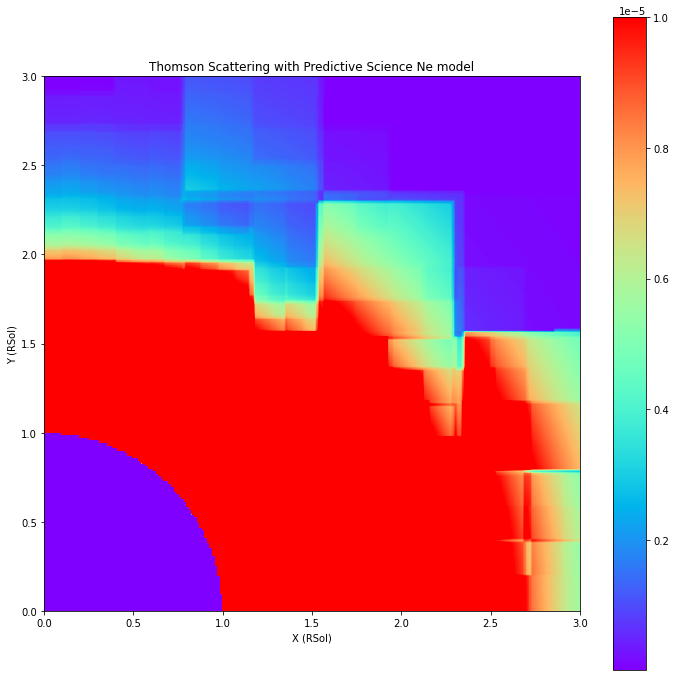

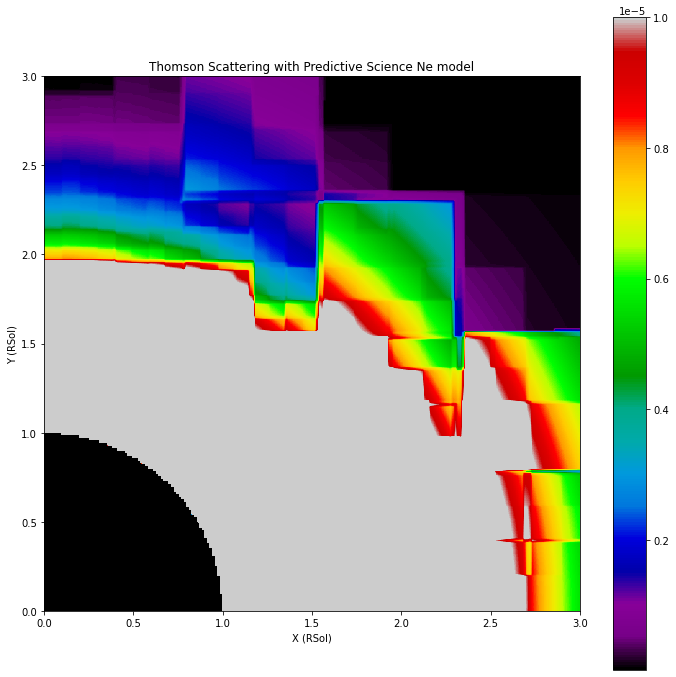

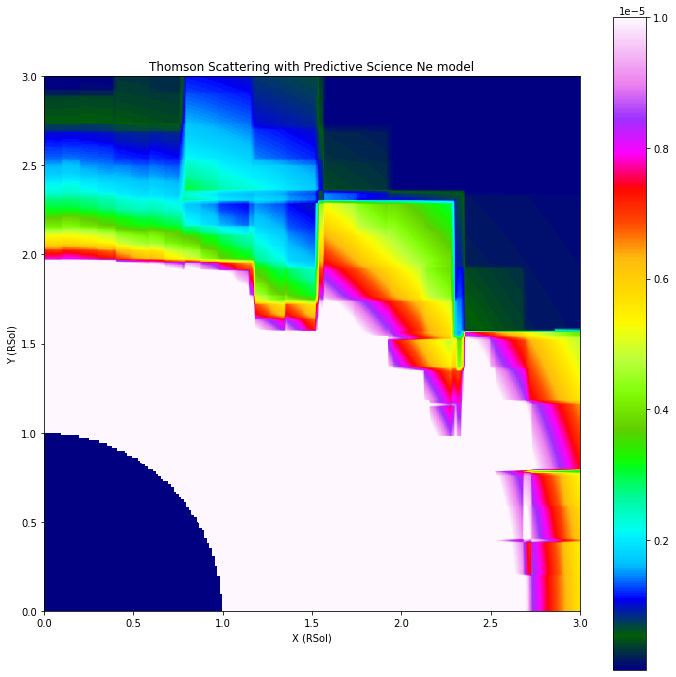

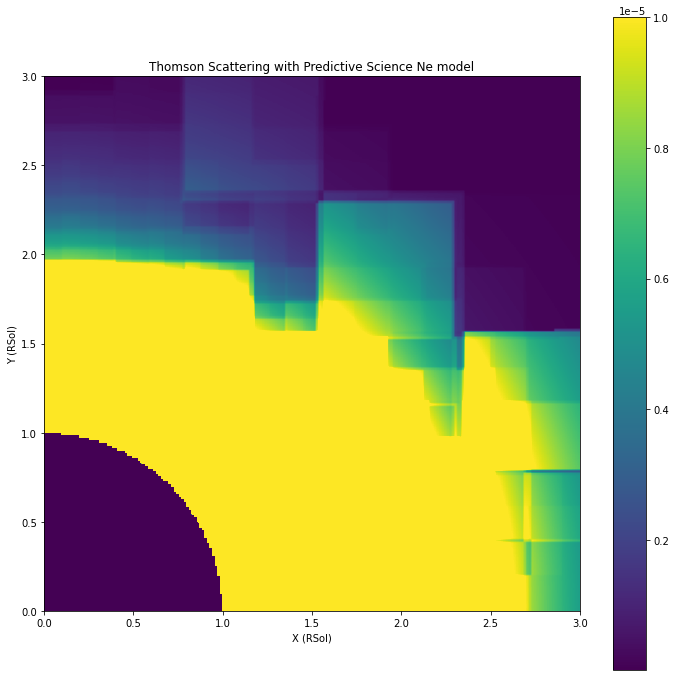

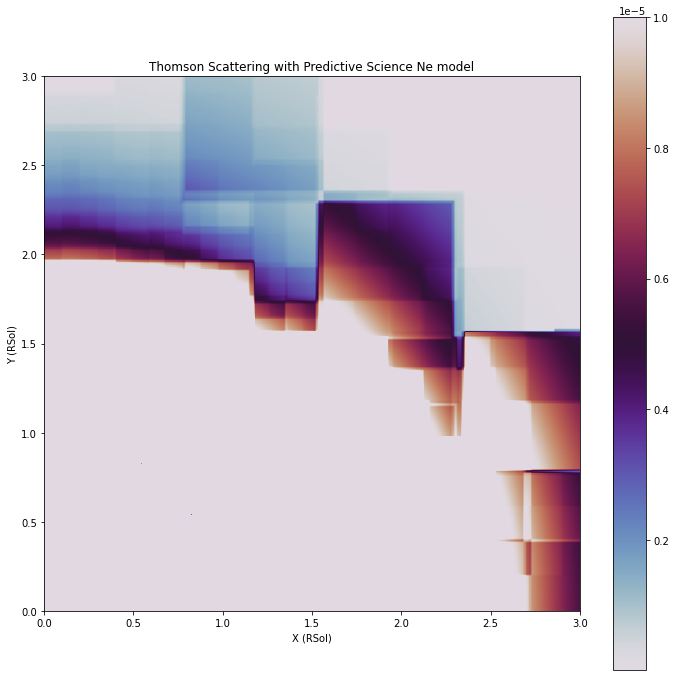

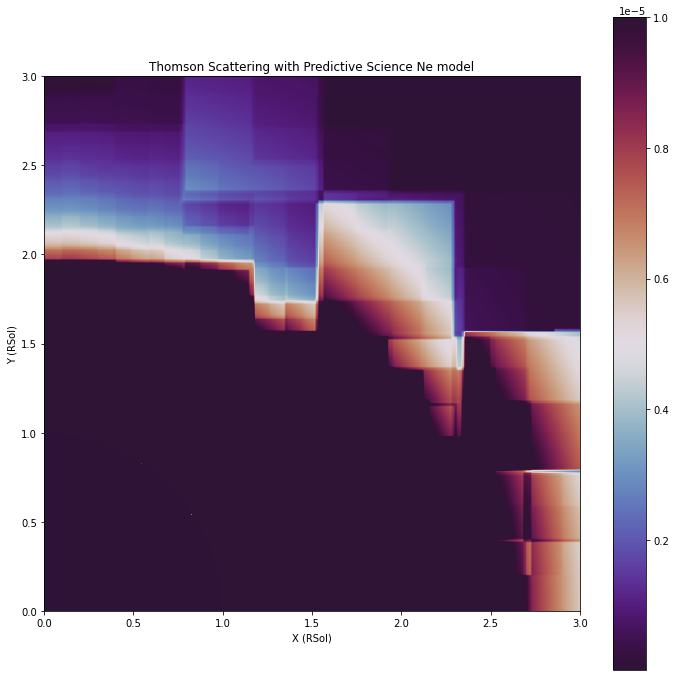

In [53]:
"""
Visualization of the Thomson Scattering.
"""
colormaps = ['rainbow', 'nipy_spectral', 'gist_ncar', 'viridis', 'twilight', 'twilight_shifted']
for i in colormaps:
    plt.figure(figsize=(12, 12))
    plt.title("Thomson Scattering with Predictive Science Ne model")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    plt.imshow(model, cmap = i, vmin = 1e-8, vmax = 1e-5, extent=[0, sip.MAX_COORD * units.METERS_TO_RSOL, 0, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()
